In [1]:

import os
import gc
import numpy as np  
import scanpy as sc
import pandas as pd
from conformalSC_annotator import  ConformalSCAnnotator


import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings


query_data_path = 'test_data\GSE131907_Lung_Cancer\GSE131907_Lung_Cancer_10K_normalized_log2TPM_matrix.h5ad'
adata_query = sc.read_h5ad(query_data_path) 

## This is te expected input data: ##

X = adata_query.X.astype(np.float32)                        # data matrix (cells x genes)
var_query_list = adata_query.var["features"].tolist()       # This is the case of the list
#var_query_df = pd.DataFrame({'features':var_query_list })  # Unncomment for testing. This is the case of the df
obs_query = adata_query.obs                                 # not needed, for ground thruth test

     


c:\Users\Marcos\anaconda3\envs\conformals\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
annotator = ConformalSCAnnotator(X, var_query_list, obs_query) # obs_query is optional, it will be used for annotate the predicted cells. 

annotator.quality_control()  ## This is an optional step to do a basic preprocess the data. If the data is already preprocessed, this step is optional.

annotator.configure(model = "HumanLung_TopMarkersFC_level3",
                        CP_predictor = "mondrian",                        # mondrian or cluster
                        cell_type_level = "celltype_level3",        # lineage_level2   celltype_level3
                        test = False,
                        alpha = [0.01, 0.05, 0.1],
                        epoch=25,
                        batch_size = 525)  
    

# annotate your data to a given significance level
annotator.annotate(batch_correction="combat")  # batch_correction = "combat" or "harmony" or "mnn" or False


Succesfully generated object:  (88144, 10000)
Filtering low quality cells...
Filtered! Post-QC shape:  (88120, 10000)
Model not trained yet. Fitting the model first.
Loading reference data...
Reference data loaded.
Detecting common genes...
Common genes detected: 640
Running integration....
Data integrated!

Label distribution:
celltype_level3
AM                        95610
AT2                       56383
iMON                      17253
CAP1                      14696
Suprabasal                11162
AT1                       10137
Ciliated                   9629
NK                         8686
Basal                      7635
CAP2                       6985
IM                         5888
CD4_T                      5515
AF1                        4844
VEC                        4514
SVEC                       4269
RAS                        3999
AEC                        3974
Serous                     3329
LEC                        3281
CD8_T                      3170
B             

In [6]:

# Get the predictions returning the observations of the query data object
#print("\nPredicted annotations sets: \n" , annotator.adata_query.obs)


for pred,cp_pred,o_g_t, o_g_t_2  in zip(annotator.adata_query.obs["predicted_labels"],annotator.adata_query.obs["prediction_sets_0.05"],  obs_query["Cell_subtype"].tolist(), obs_query["Cell_type"].tolist()):
    
    if pred == "OOD":
       
           
        print(f"Predicted: {pred} - CP: {cp_pred}")
        print(f"original cell Subt: {o_g_t} -  original cell type: {o_g_t_2}")
        print("\n")

    
#ground_truth_labels_list = obs_query["Cell_subtype"].tolist()
#annotator.recover_original_cells( ground_truth_labels_list, similarity_threshold=70)


#y_true = annotator._mapped_original_ground_truth_labels ## Ground thruth labels mapped to the model labels (predictions)
#annotator._mapping



#for pred,cp_pred, true, o_g_t, o_g_t_2 in zip(annotator.adata_query.obs["predicted_labels"],annotator.adata_query.obs["prediction_sets_0.05"], y_true, ground_truth_labels_list, obs_query["Cell_type"].tolist()):
#    if y_true != "OOD":
#        print(f"Predicted: {pred} - CP: {cp_pred} - True: {true}. original cell Subt: {o_g_t} -  original cell type: {o_g_t_2}")

Predicted: OOD - CP: ['OOD']
original cell Subt: Alveolar Mac -  original cell type: Myeloid cells


Predicted: OOD - CP: ['OOD']
original cell Subt: CD163+CD14+ DCs -  original cell type: Myeloid cells


Predicted: OOD - CP: ['OOD']
original cell Subt: CD8 low T -  original cell type: T lymphocytes


Predicted: OOD - CP: ['OOD']
original cell Subt: Follicular B cells -  original cell type: B lymphocytes


Predicted: OOD - CP: ['OOD']
original cell Subt: MAST -  original cell type: MAST cells


Predicted: OOD - CP: ['OOD']
original cell Subt: Cytotoxic CD8+ T -  original cell type: T lymphocytes


Predicted: OOD - CP: ['OOD']
original cell Subt: nan -  original cell type: T lymphocytes


Predicted: OOD - CP: ['OOD']
original cell Subt: Alveolar Mac -  original cell type: Myeloid cells


Predicted: OOD - CP: ['OOD']
original cell Subt: Alveolar Mac -  original cell type: Myeloid cells


Predicted: OOD - CP: ['OOD']
original cell Subt: nan -  original cell type: NK cells


Predicted: OOD

In [4]:
np.unique(obs_query["Cell_subtype"].tolist())

array(['AT1', 'AT2', 'Activated DCs', 'Alveolar Mac', 'CD141+ DCs',
       'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th',
       'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs',
       'COL14A1+ matrix FBs', 'Ciliated', 'Club', 'Cytotoxic CD8+ T',
       'EPCs', 'Exhausted CD8+ T', 'Exhausted Tfh', 'FB-like cells',
       'Follicular B cells', 'GC B cells in the DZ',
       'GC B cells in the LZ', 'GrB-secreting B cells', 'Lymphatic ECs',
       'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes',
       'Myofibroblasts', 'NK', 'Naive CD4+ T', 'Naive CD8+ T',
       'Pericytes', 'Plasma cells', 'Pleural Mac', 'Smooth muscle cells',
       'Stalk-like ECs', 'Tip-like ECs', 'Treg', 'Tumor ECs',
       'Undetermined', 'mo-Mac', 'nan', 'pDCs', 'tS1', 'tS2', 'tS3'],
      dtype='<U32')

In [5]:
adata_combined.obs.columns

NameError: name 'adata_combined' is not defined

In [ ]:
import scanpy as sc

# Load the integrated AnnData object
adata_combined = sc.read("saves/integrated_adata_combat.h5ad")

                                

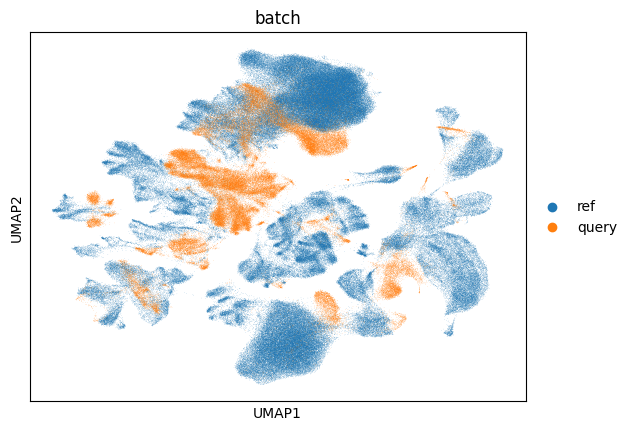

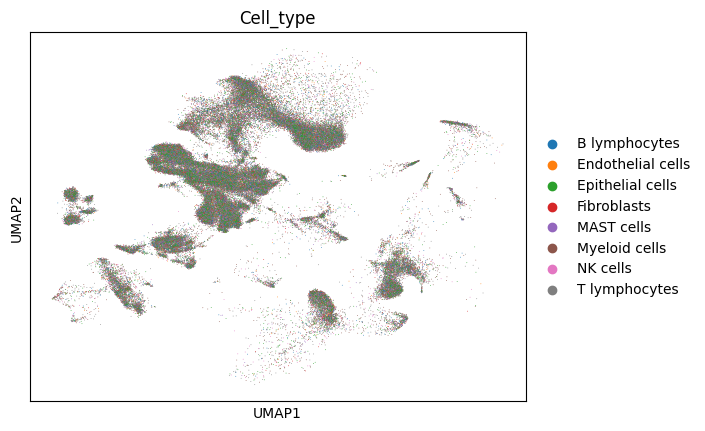

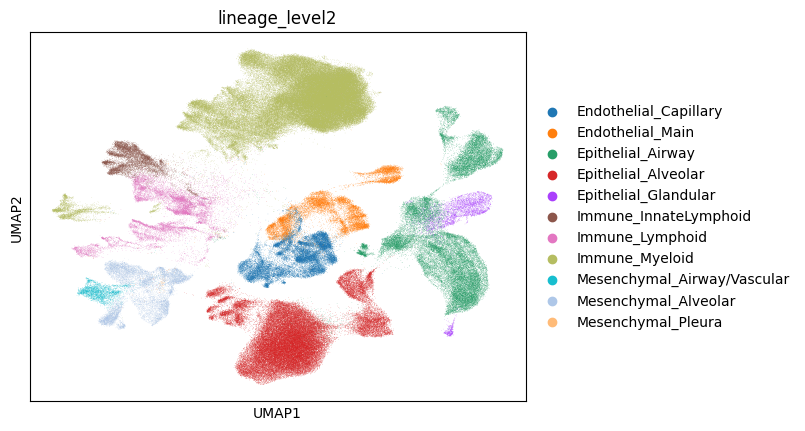

In [ ]:
# Plot UMAP directly
sc.pl.umap(adata_combined, color=["batch"])
sc.pl.umap(adata_combined[adata_combined.obs["Cell_type"].notnull()], color=["Cell_type"])
sc.pl.umap(adata_combined[adata_combined.obs["lineage_level2"].notnull()], color=["lineage_level2"]) 

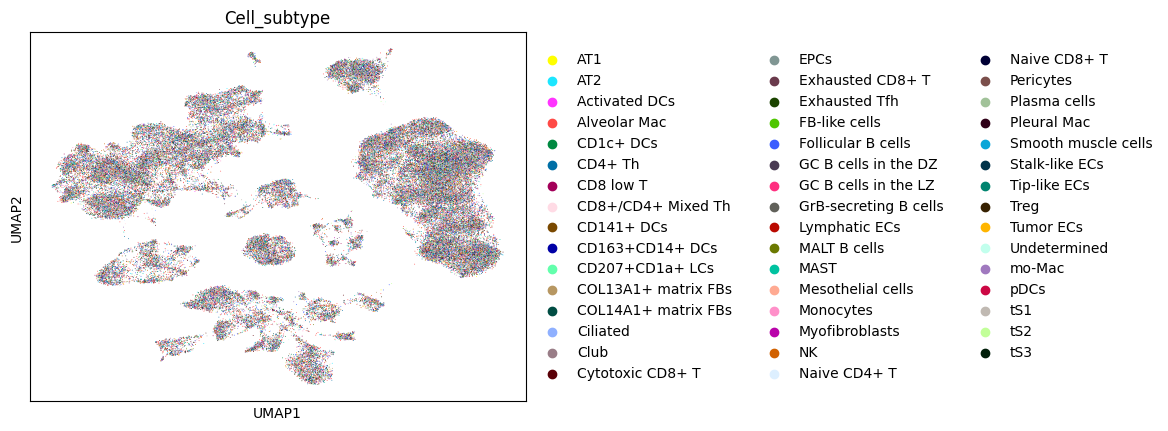

In [ ]:

 

# Visualize UMAP
sc.pp.neighbors(adata_query)
sc.tl.umap(adata_query[adata_query.obs["Cell_subtype"].notnull()])
sc.pl.umap(adata_query[adata_query.obs["Cell_subtype"].notnull()], color=["Cell_subtype"])



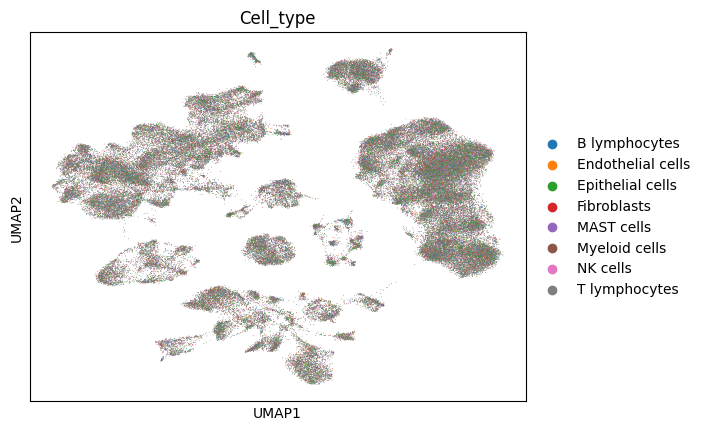

In [ ]:
sc.pl.umap(adata_query[adata_query.obs["Cell_type"].notnull()], color=["Cell_type"])